In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
sns.set_style("whitegrid")
sns.set_palette("inferno")

In [13]:
df = pd.read_csv("lyrics_data.csv")

In [14]:
df.head(1)

,song_title,song_release_date,featured,song_popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,...,artist_popularity,artist_followers,album_name,album_total_tracks,album_popularity,lyrics,genre,day_of_week,release_year,duration
0,It's All Over Now - Mono Version,1964-10-17,0,47,0.0235,0.603,0.689,0.000003,0.33,-10.729,...,79.0,14083807.0,12 X 5,12,45,"Well, baby used to stay out all night long Sh...",rock,Saturday,1964,206.0


In [15]:
lyrics_data = df["lyrics"]
vectorizer = TfidfVectorizer()
words = vectorizer.fit_transform(lyrics_data)

In [16]:
words_df = pd.DataFrame.sparse.from_spmatrix(words, columns=vectorizer.get_feature_names_out())

In [17]:
df = df.rename(columns={"energy": "energy_level", "danceability": "danceability_level",
                                              "key": "key_level", "loudness": "loudness_level",
                                              "valence": "valence_level", "tempo": "tempo_level",
                                              "genre": "artist_genre", "featured": "is_feat",
                                              "duration": "duration_s", "energy": "energy_level"})
data = pd.concat([df.drop(["lyrics", "acousticness", "instrumentalness", "mode", "liveness"], axis=1), words_df], axis=1)

In [18]:
curse_words = ["fuck", "shit", "bitch", "ass", "asshole", "slut", "whore", "motherfucker", "piss", "cunt", "damn", "dick", "pussy", "bullshit", "bastard"]
data["curse_words"] = 0
for c_word in curse_words:
    try:
        data["curse_words"] += data[c_word]
    except:
        pass

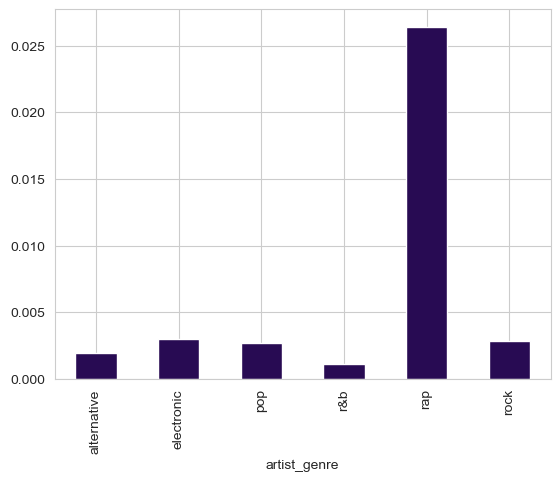

In [22]:
data.groupby("artist_genre")["curse_words"].mean().plot(kind="bar")
plt.show()

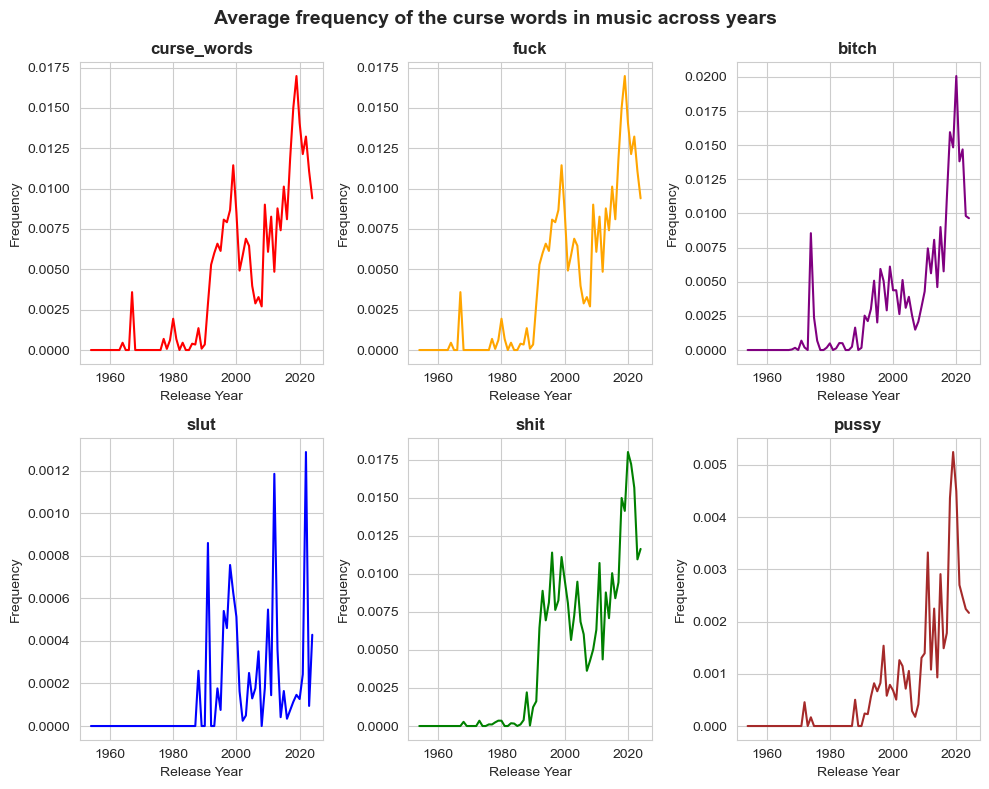

In [42]:
fig, axes = plt.subplots(figsize=(10,8), nrows=2, ncols=3)

for ax, col, color in zip(axes.flatten(), ["curse_words", "fuck", "bitch", "slut", "shit", "pussy"], ["red", "orange", "purple", "blue", "green", "brown"]):
    sns.lineplot(data=data, x="release_year", y=col, errorbar=None, ax=ax, c=color)
    ax.set_title(col, weight="bold")
    ax.set_xlabel("Release Year")
    ax.set_ylabel("Frequency")
fig.suptitle("Average frequency of the curse words in music across years", weight="bold", fontsize=14)
plt.tight_layout()
plt.show()